<bound method NDFrame.head of      Year      Team  Game  Win  Home   MP  FG  FGA    FGP  TP  ...  ORB  DRB  \
0    1980    Lakers     2    0     1  240  48   95  0.505   0  ...   15   37   
1    1980    Lakers     3    1     0  240  44   92  0.478   0  ...   22   34   
2    1980    Lakers     6    1     0  240  45   92  0.489   0  ...   17   35   
3    1981   Celtics     1    1     1  240  41   95  0.432   0  ...   25   29   
4    1981   Celtics     2    0     1  240  41   82  0.500   0  ...   14   34   
..    ...       ...   ...  ...   ...  ...  ..  ...    ...  ..  ...  ...  ...   
209  2017  Warriors     5    1     1  240  46   90  0.511  14  ...   13   29   
210  2018  Warriors     1    1     1  265  46   90  0.511  13  ...    4   34   
211  2018  Warriors     2    1     1  240  47   82  0.573  15  ...    7   34   
212  2018  Warriors     3    1     0  240  42   81  0.519   9  ...    6   31   
213  2018  Warriors     4    1     0  240  39   86  0.453  14  ...   10   34   

     TRB 

<AxesSubplot:title={'center':'PF'}, xlabel='Win'>

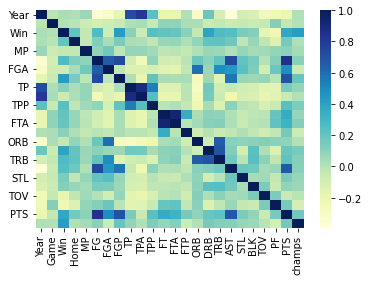

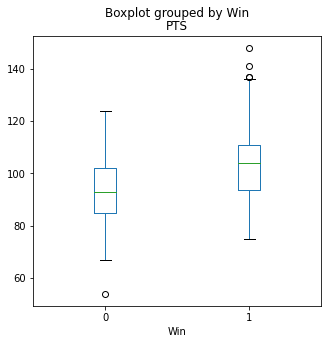

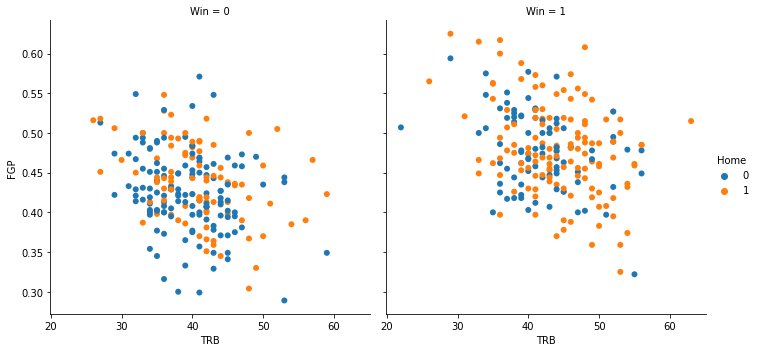

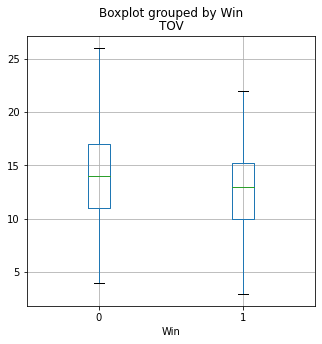

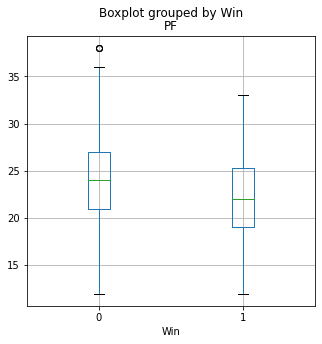

In [9]:
"""
Created on 17 June 2022

@author: Omer Canca
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Reading files in. w will be for the champions, l for the runner-ups.
w = pd.read_csv('championsdata.csv')
l = pd.read_csv('runnerupsdata.csv')

# Examining files
print(w.head)
print(w.shape)
print(l.head)
print(l.shape)

# Removing any possible null values
print(w.isnull().sum)
w = w.dropna() 
print(l.isnull().sum)
l = l.dropna() 

# Adding a 1 for win in every column of the winners file
# Adding a 0 for loss in every column of the winners file
w["champs"] = 1
w.to_csv("championsdata.csv", index=False)
l["champs"] = 0
l.to_csv("runnerupsdata.csv", index=False)

# Merging the CSV files into one
df = pd.concat(map(pd.read_csv, ['championsdata.csv', 'runnerupsdata.csv']), ignore_index=True)
print(df)
df.to_csv("nbadata.csv", index=False)

# Correlation matrix
corrm = df.corr()
sns.heatmap(corrm, cmap = "YlGnBu")
# FGP. Win, PTS, AST, REB, Home have strong correlation


# Boxplot for points and win
df.boxplot(by ='Win', column =['PTS'], grid = False, figsize = (5,5))


# Scatterplot for FGP and win and TRB and Home
sns.relplot(col="Win", x ="TRB", y="FGP", hue="Home", sizes=(1, 8), linewidth=0, data = df)


# Boxplot for TOV and Win 
df.boxplot(by="Win", column=["TOV"],figsize = (5,5))
# Boxplot for PF and Win 
df.boxplot(by="Win", column=["PF"], figsize = (5,5))
